In [1]:
import numpy as np 
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Get the Data
- ID            : Internal kickstarter id
- name          : Name of project
- category      : category of project
- main_category : category of campaign
- currency      : currency used to support
- deadline      : deadline of crowdfunding
- goal          : f undraising goal
- launched      : date launched
- pledged       : amount pledged by the crowd
- state         : Current condition the project is in
- backers       : number of backers
- country       : country pledged from
- usd pledged   : amount of money pledges

In [2]:
df=pd.read_csv("ks-projects-201801.csv")

## Check the dataset

In [3]:
print (df.shape[0], 'rows',',',df.shape[1],'columns')

378661 rows , 15 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [6]:
# Uniqueness of each columns
df.nunique().sort_values()

state                    6
currency                14
main_category           15
country                 23
category               159
deadline              3164
backers               3963
goal                  8353
usd_goal_real        50339
pledged              62130
usd pledged          95455
usd_pledged_real    106065
name                375764
launched            378089
ID                  378661
dtype: int64

In [7]:
# Number of missing data in each column
df.isnull().sum().sort_values(ascending=False)

usd pledged         3797
name                   4
usd_goal_real          0
usd_pledged_real       0
country                0
backers                0
state                  0
pledged                0
launched               0
goal                   0
deadline               0
currency               0
main_category          0
category               0
ID                     0
dtype: int64

Two columns contain NaN values
- 'usd pledged' contains 3797 NaN.
- 'name' contains 4 NaN, the values in name column are unique, we are not going to use it in analysis, the null value in the column can be ignored

### Convert launched & deadline to type datatime

In [8]:
# convert "launched" & "deadline" to datetime
from datetime import datetime
df['deadline'] = [datetime.strptime(x, '%Y-%m-%d') for x in df.deadline]
df['launched'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df.launched]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(6)
memory usage: 43.3+ MB


### State

In [9]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

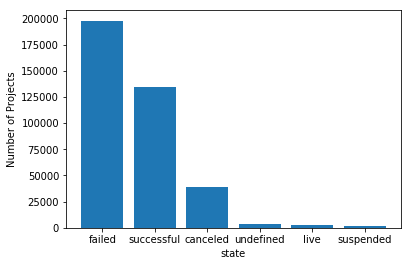

In [10]:
a = df.state.value_counts()
plt.bar(a.index,a.values)
plt.xlabel('state')
plt.ylabel('Number of Projects')
plt.show()

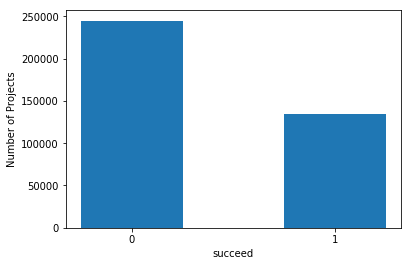

In [195]:
# create a column 'succeed'; succeed=1 if state='successful' other succeed=0
df['succeed'] = np.where(df['state'] == 'successful', 1, 0)
a = df.succeed.value_counts()
plt.bar(a.index, a.values, 1.5/3)
plt.xlabel('succeed')
plt.xticks([0,1])
plt.ylabel('Number of Projects')
plt.show()

### MainCategory

In [36]:
df.main_category.value_counts().sort_values(ascending=False)

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

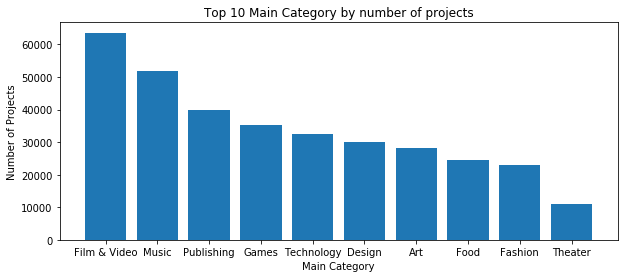

In [62]:
# Top 10 Main category
a = df.main_category.value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,4))
plt.bar(a.index,a.values)
plt.xlabel('Main Category')
plt.ylabel('Number of Projects')
plt.title('Top 10 Main Category by number of projects')
plt.show()

In [146]:
# Calculate the successful rate of each main category
MainCategory_Succeed = pd.crosstab(df['succeed'],df['main_category'],margins=True)
MainCategory_Success_Rate = (MainCategory_Succeed/MainCategory_Succeed.loc['All']*100).round(2)
MainCategory_Success_Rate
# MainCategory_Success_Rate.filter([0,1],axis=0)

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,All
succeed,,,,,,,,,,,,,,,,
0,59.12,46.0,75.99,37.95,64.92,75.49,62.85,75.27,64.47,78.72,53.39,69.34,69.15,80.25,40.13,64.62
1,40.88,54.0,24.01,62.05,35.08,24.51,37.15,24.73,35.53,21.28,46.61,30.66,30.85,19.75,59.87,35.38
All,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


- Dance has the highest successful rate (62.05%) among all the main category
- Technology has the lowest successful rate (19.75%)

### Currency

In [154]:
df.currency.value_counts().sort_values(ascending=False)

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

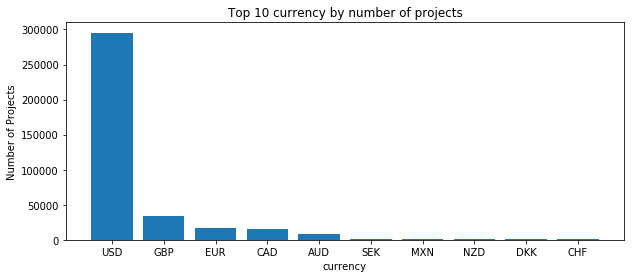

In [180]:
# Top 10 Main currency
a = df.currency.value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,4))
plt.bar(a.index,a.values)
plt.xlabel('currency')
plt.ylabel('Number of Projects')
plt.title('Top 10 currency by number of projects')
plt.show()

In [192]:
b = pd.DataFrame(data = a.values,
                 columns=['project_count'],
                 index = a.index)
b['percentage'] = (a.values / len(df) * 100).round(2)
b

,project_count,percentage
USD,295365,78.00
GBP,34132,9.01
EUR,17405,4.60
CAD,14962,3.95
AUD,7950,2.10
SEK,1788,0.47
MXN,1752,0.46
NZD,1475,0.39
DKK,1129,0.30
CHF,768,0.20


- 78% of the projects were funded by USD.
- We can add a columns to group the projects into USD-Funded, and non-USD-Funded

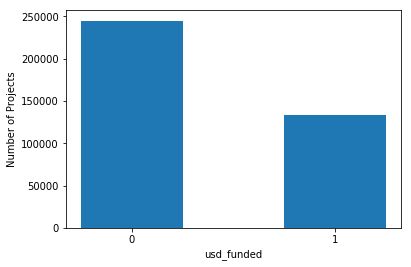

In [194]:
# create a column 'usd_funded'; 1 if current=USD other 0
df['usd_funded'] = np.where(df['currency'] == 'USD', 1, 0)
a = df.succeed.value_counts()
plt.bar(a.index, a.values, 1.5/3)
plt.xlabel('usd_funded')
plt.xticks([0,1])
plt.ylabel('Number of Projects')
plt.show()

### Currency vs Succeed

### Country

### What goal should I set so that people are willing to contribute

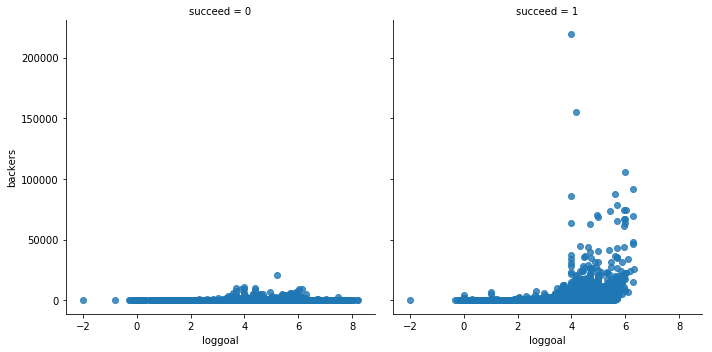

In [12]:
# usd_goal_real vs number of backers
df['loggoal'] = np.log10(df['usd_goal_real'])
sns.lmplot(x = 'loggoal', y = 'backers', col ='succeed', data = df, fit_reg = False)
plt.show()

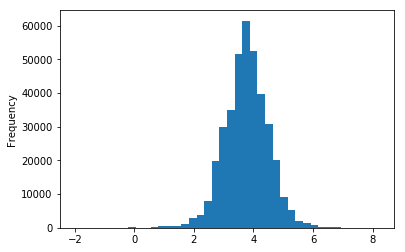

In [60]:
df['loggoal'].plot.hist(bins = 40)
plt.show()

In [52]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,succeed,loggoal
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05,378661.000000,378661.000000
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04,0.353762,3.750108
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06,0.478137,0.737391
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0.000000,-2.000000
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,0.000000,3.301030
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03,0.000000,3.740363
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04,1.000000,4.190332
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,1.000000,8.221053
